In [1]:
## Classify different images of cloths and using tensorflow fashion mnist dataset 

import pandas as pd 
import numpy as np
import keras 
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images[0].shape, train_labels.shape

((28, 28), (60000,))

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
y_train = tf.one_hot(train_labels, depth=10)
y_test = tf.one_hot(test_labels, depth=10)

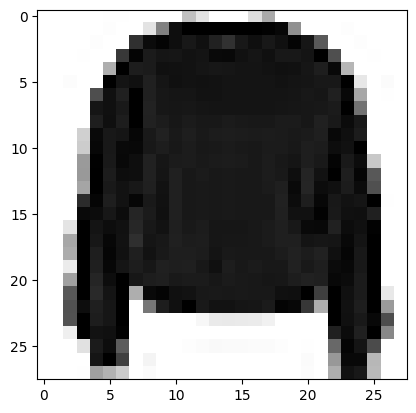

In [6]:
# Plot a single sample 

plt.imshow(train_images[7], cmap=plt.cm.binary)

In [7]:
# Create a small list so that we can index onto our training labels so they are human readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boat"]

In [8]:
len(class_names)

10

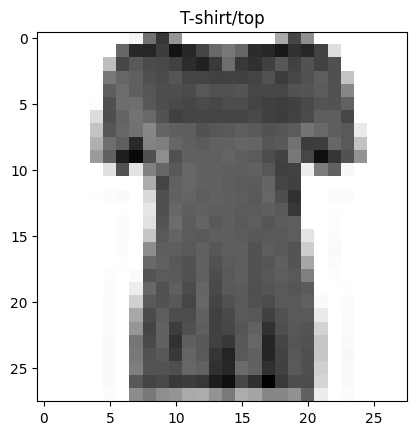

In [9]:
#plot and example image and label

def plot_image_with_class_name(X_train=train_images, y_train=train_labels, class_names=class_names, index=0):
    plt.imshow(X_train[index], cmap=plt.cm.binary)
    plt.title(class_names[y_train[index]]) 

plot_image_with_class_name(index=10)

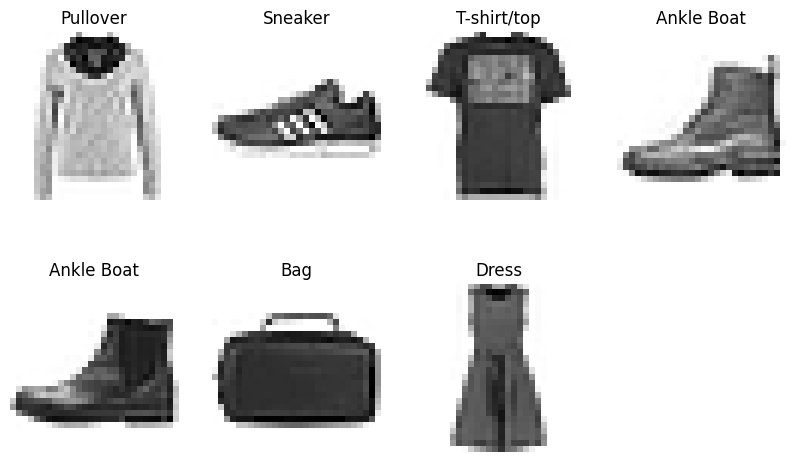

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def plot_n_number_of_images(images=train_images,
                            labels=train_labels,
                            label_names=class_names,
                            num_sample=15,
                            num_col=5):
    plt.figure(figsize=(10, 6))
    for i in range(num_sample):
        ax = plt.subplot(int(np.ceil(num_sample / num_col)), num_col, i+1) 
        rand_index = random.choice(range(len(images))) 
        plt.imshow(images[rand_index], cmap=plt.cm.binary)
        plt.title(label_names[train_labels[rand_index]])
        plt.axis(False)

plot_n_number_of_images(num_sample=7, num_col=4)

In [11]:
keras.utils.set_random_seed(42)

model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    loss=keras.losses.CategoricalCrossentropy(),   # y_train must be one-hot if not use SparseCategoricalCrossentropy()
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_1.summary()
model_1.fit(train_images, y_train, epochs=100, verbose=1, batch_size=4096, validation_data=(test_images, y_test))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2145 - loss: 71.9347 - val_accuracy: 0.4478 - val_loss: 6.1324
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4760 - loss: 4.4414 - val_accuracy: 0.4830 - val_loss: 2.1991
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4872 - loss: 2.0214 - val_accuracy: 0.5019 - val_loss: 1.7299
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5182 - loss: 1.6417 - val_accuracy: 0.5443 - val_loss: 1.5371
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5629 - loss: 1.4813 - val_accuracy: 0.5771 - val_loss: 1.4366
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 1.3780 - val_accuracy: 0.5915 - val_loss: 1.3603
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6017 - loss: 1.3063 - val_accuracy: 0.6027 - val_loss: 1.3025
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: 1.2459 - val_accuracy: 0.6165 -

In [12]:
keras.utils.set_random_seed(42)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),   # y_train must be one-hot
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.summary()
history_2 = model_2.fit(train_images, 
            train_labels, 
            epochs=100, 
            verbose=0, 
            batch_size=4096, 
            validation_data=(test_images, test_labels)
           )


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
y_preds = model_2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


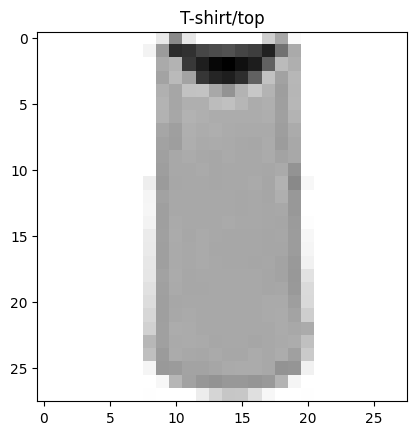

In [14]:
plot_image_with_class_name(index=np.argmax(y_preds[1]))

In [15]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,932 (495.83 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,622 (330.56 KB)

In [16]:
## Neural networks data to be scaled or normalized 

train_images.min(), train_images.max()

(0, 255)

In [17]:
# We can normalize testing and training data by dividing max value 

train_images_norm = train_images / train_images.max() 
test_images_norm = test_images / train_images.max() 

In [18]:
train_images_norm.min(), train_images_norm.max()

(0.0, 1.0)

In [19]:
# Model-3 with normalized data 
keras.utils.set_random_seed(42)

input_shape = train_images[0].shape
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
])

model_3.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [21]:
history_3 = model_3.fit(
    train_images_norm, 
    y_train,
    epochs=150, 
    validation_data=(test_images_norm, y_test), 
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=5, 
            restore_best_weights=True, 
        ), 
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            patience=5, 
            restore_best_weights=True
        )
    ], 
    verbose=1,
    batch_size=4096
)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.2706 - loss: 2.1106 - val_accuracy: 0.6089 - val_loss: 1.3852 - learning_rate: 0.0010
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6524 - loss: 1.2093 - val_accuracy: 0.7024 - val_loss: 0.8540 - learning_rate: 0.0010
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7263 - loss: 0.7891 - val_accuracy: 0.7475 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7699 - loss: 0.6560 - val_accuracy: 0.7795 - val_loss: 0.6249 - learning_rate: 0.0010
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7966 - loss: 0.5889 - val_accuracy: 0.7950 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8123 - loss: 0.5464 - val_accuracy: 0.8087 - val_loss: 0.5478 - learning_rate: 0.0010
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8219 - loss: 0.5162 - va

In [22]:
model_2.evaluate(test_images, test_labels), model_3.evaluate(test_images_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.6244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8748 - loss: 0.3546


([0.6137494444847107, 0.7940000295639038],
 [0.35829392075538635, 0.8726999759674072])

<Axes: >

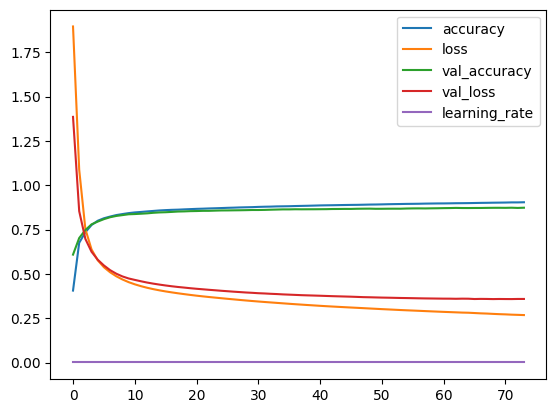

In [23]:
pd.DataFrame(history_3.history).plot()

<Axes: >

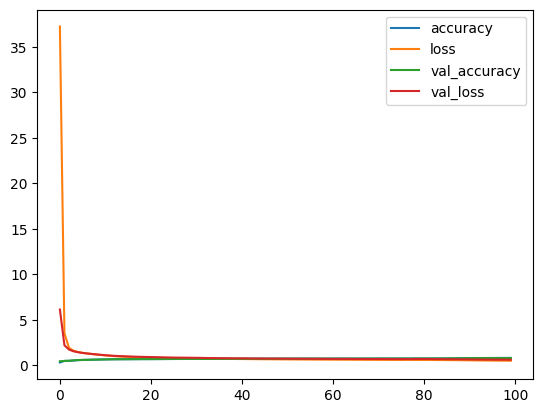

In [24]:
pd.DataFrame(history_2.history).plot()

## Finding ideal learning rate 

In [25]:
keras.utils.set_random_seed(42) 

model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

model_4.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

find_lr_history = model_4.fit(
    train_images_norm, 
    y_train, 
    validation_data=(test_images_norm, y_test), 
    epochs=100, 
    batch_size=4096, 
    verbose=0, 
    callbacks=[lr_scheduler]
)

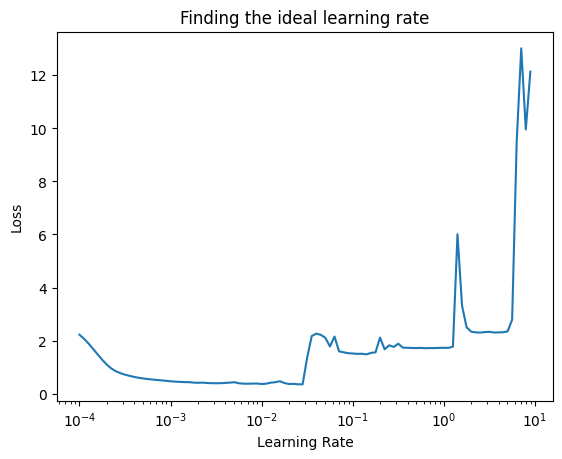

In [26]:
## Plot the learning rate decay curve 

lrs = 1e-4 * (10**(tf.range(100)/20)) 
plt.semilogx(lrs, find_lr_history.history['val_loss']) 
plt.xlabel("Learning Rate")
plt.ylabel("Loss") 
plt.title("Finding the ideal learning rate");

In [27]:
keras.utils.set_random_seed(42) 

model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

model_5.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['accuracy']
)


history_5 = model_5.fit(
    train_images_norm, 
    y_train, 
    validation_data=(test_images_norm, y_test), 
    epochs=100, 
    batch_size=4096, 
    verbose=0
)

In [28]:
model_5.evaluate(test_images_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8748 - loss: 0.3590


[0.35946351289749146, 0.8727999925613403]

In [29]:
y_preds_5 = model_5.predict(test_images_norm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


In [54]:
# y_preds_actual = [np.argmax(i) for i in y_preds_5]
y_preds_actual = y_preds_5.argmax(axis=1)

In [55]:
y_preds_actual[:3]

array([9, 2, 1])

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [35]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
confusion_matrix = confusion_matrix(y_true=test_labels, y_pred=y_preds_actual)
confusion_matrix

array([[766,   2,  20,  46,   4,   3, 151,   0,   8,   0],
       [  1, 961,   3,  27,   3,   0,   5,   0,   0,   0],
       [  8,   1, 814,  18,  79,   0,  80,   0,   0,   0],
       [ 17,   5,  18, 912,  21,   0,  24,   0,   3,   0],
       [  0,   0, 138,  47, 745,   1,  68,   0,   1,   0],
       [  0,   0,   0,   0,   0, 959,   0,  28,   2,  11],
       [ 89,   3,  93,  42,  53,   0, 715,   0,   5,   0],
       [  0,   0,   0,   0,   0,  28,   0, 953,   0,  19],
       [  5,   1,   7,   4,   5,   4,  13,   5, 956,   0],
       [  1,   0,   0,   0,   0,  13,   1,  38,   0, 947]])

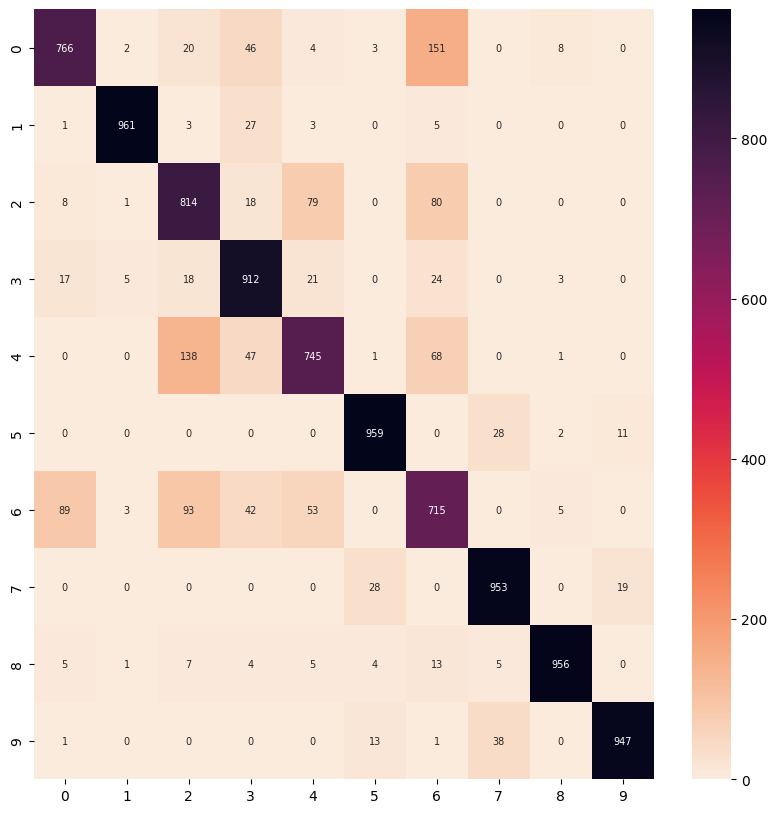

In [53]:
import seaborn as sns 

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, 
            annot=True, 
            cmap='rocket_r', 
           annot_kws={"size": 7}, 
           fmt="d");